<a href="https://colab.research.google.com/github/Siaaaanadong/LendingClubProject/blob/main/%E6%95%B0%E6%8D%AE%E5%8F%AF%E8%A7%86%E5%8C%96%26%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lending Club EDA**

In [ ]:
from pathlib import Path

import pandas as pd
pd.set_option('display.max_rows', 500)  #最大行数
pd.set_option('display.max_columns', 500)    #最大列数
pd.set_option('display.width', 4000)        #页面宽度

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install squarify

In [ ]:
import matplotlib.pyplot as plt
import squarify

In [ ]:
! pip install chart_studio

     |████████████████████████████████| 64 kB 3.2 MB/s 


In [ ]:
import chart_studio.plotly as py

In [ ]:
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## I. Basic Information & Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Capstone Project/train_data.csv")  #for EDA 

data.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,8.81,317.12,A,A5,NaN,NaN,MORTGAGE,56000.0,Verified,Nov-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,852xx,AZ,20.53,0.0,Apr-2011,1.0,NaN,93.0,7.0,1.0,10494,53.3,19.0,w,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,Jan-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,301829.0,1.0,3.0,1.0,2.0,11.0,20277.0,59.0,0.0,2.0,5295.0,57.0,19700.0,3.0,1.0,3.0,5.0,43118.0,2323.0,80.6,0.0,0.0,91.0,71.0,19.0,6.0,3.0,19.0,NaN,5.0,NaN,0.0,2.0,3.0,2.0,2.0,10.0,3.0,6.0,3.0,7.0,0.0,0.0,0.0,2.0,100.0,50.0,1.0,0.0,327790.0,30771.0,12000.0,34590.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000,10000,10000.0,60 months,27.27,306.97,E,E5,CNC Robotic Welder,10+ years,RENT,70000.0,Source Verified,Nov-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,612xx,IL,11.37,0.0,Nov-2008,1.0,60.0,NaN,4.0,0.0,3193,84.0,24.0,w,0.0,0.0,284.25,284.25,79.72,204.53,0.0,0.0,0.0,Dec-2018,306.97,NaN,Feb-2019,0.0,60.0,1,Individual,NaN,NaN,NaN,0.0,0.0,23289.0,2.0,2.0,3.0,5.0,1.0,20096.0,93.0,0.0,2.0,1568.0,91.0,3800.0,0.0,11.0,2.0,7.0,5822.0,232.0,87.1,0.0,0.0,120.0,89.0,17.0,1.0,0.0,17.0,60.0,3.0,60.0,2.0,1.0,2.0,1.0,3.0,20.0,2.0,4.0,2.0,4.0,0.0,0.0,0.0,3.0,91.7,100.0,0.0,0.0,25493.0,23289.0,1800.0,21693.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4800,4800,4800.0,36 months,16.91,170.92,C,C5,Information Tech II,10+ years,MORTGAGE,111000.0,Source Verified,Nov-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,231xx,VA,13.35,0.0

In [ ]:
data.shape

(1827125, 145)

In [ ]:
data.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [ ]:
status_count = data['loan_status'].values.tolist()
dict(zip(*np.unique(status_count,return_counts = True)))

{'Charged Off': 133526, 'Current': 828131, 'Fully Paid': 865468}

In [ ]:
#drop the current loan
#for exploration analysis, loans that were fully paid charged off are needed
data=data[~data['loan_status'].isin(['Current'])]

In [ ]:
status_count = data['loan_status'].values.tolist()
dict(zip(*np.unique(status_count,return_counts = True)))

{'Charged Off': 133526, 'Fully Paid': 865468}

In [ ]:
target_list = [1 if i == 'Charged Off' else 0 for i in data['loan_status']]

data['target'] = target_list 
data['target'].value_counts()

0    865468
1    133526
Name: target, dtype: int64

In [ ]:
#drop irrelevant columns
data.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True)

In [ ]:
data.shape

(998994, 139)

## General Exploration

* Loan status ratio 
* What amount was mostly issued to borrowers? 
* Does the average amount of issued loans increase over time?
* What are some most used borrow purposes?


[Text(0, 0.5, '(%)')]

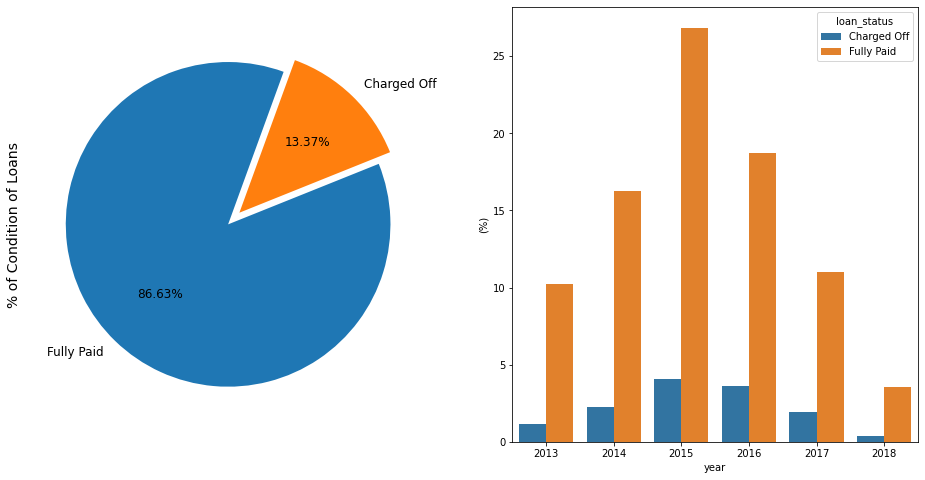

In [ ]:
#Q1 Loan Status Ratio

f, ax = plt.subplots(1,2, figsize=(16,8))
data["loan_status"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0], fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

data['issue_d'].head()
dt_series = pd.to_datetime(data['issue_d'])
data['year'] = dt_series.dt.year

sns.barplot(x="year", y="loan_amnt", hue="loan_status", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")



#### 13.37% loans in this dataset were charged off. It did hurt the revenue of the Lending Club. 
#### Also, the histogram on the right shows that in the year 2015, Lending Club had the most loans. However, since we exclude current loans, it is possible that there would be more loans after 2015.
#### Therefore, it is better to have a prediction model to prevent further default.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



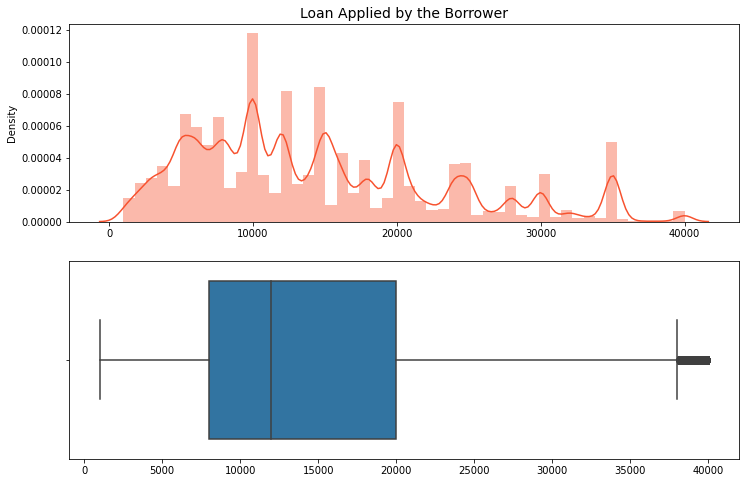

In [ ]:
#Q2 which amount was mostly issued to borrowers

fig, ax = plt.subplots(2,1,figsize = (12,8))

loan_amnt = data["loan_amnt"].values

sns.distplot(loan_amnt, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)

sns.boxplot(x=loan_amnt, ax=ax[1])

In [ ]:
data["loan_amnt"].quantile([0.25,0.5,0.75])

0.25     8000.0
0.50    12000.0
0.75    20000.0
Name: loan_amnt, dtype: float64

#### Most of the loans were issued from 8,000 to 20,000 USD. 
#### The median amount of issued loan is 12,000 USD.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Average loan amount issued')

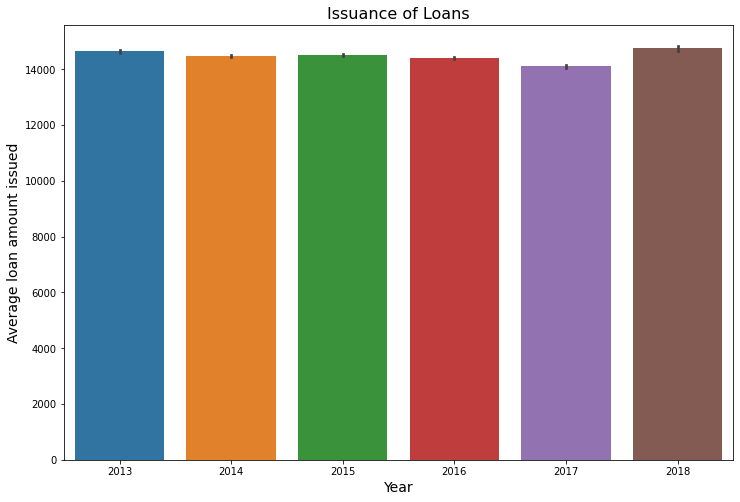

In [ ]:
#Q2 Does the total amount of issued loans increase over time?

data['full_date'] = pd.to_datetime(data['issue_d'])
data['year'] = data['full_date'].dt.year

plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=data, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

#### Based on the bar graph above, we cannot prove that the average amount of loans increase over time. The average loan amount slightly oscillates around 14,500 USD.

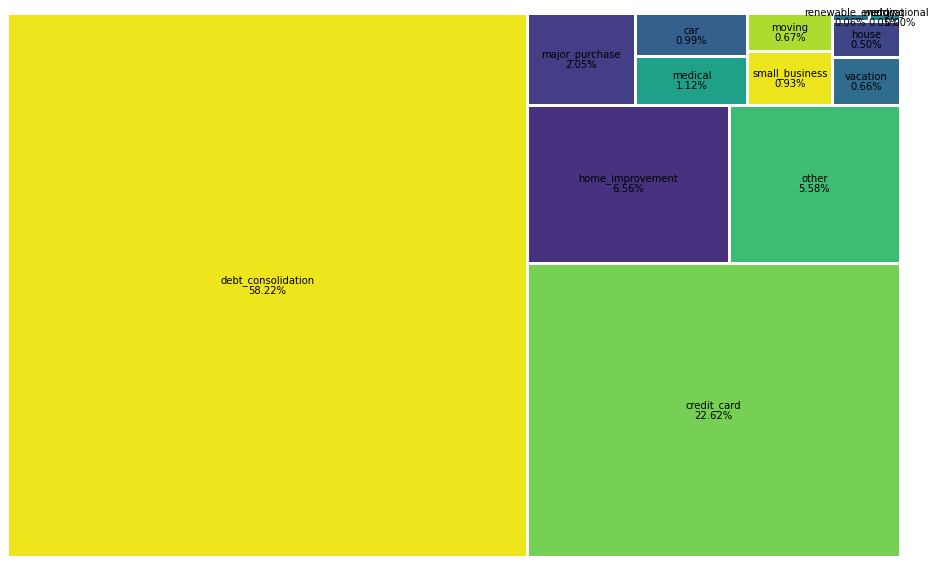

In [ ]:
#Q3 Borrow Purpose
purpose = data["purpose"].value_counts().to_frame().reset_index()
purpose['ratio'] = purpose["purpose"]/sum(purpose["purpose"])
purpose['ratio'] = purpose['ratio'].apply(lambda x: '%.2f%%' % (x*100))

plt.figure(figsize=(16,10))
squarify.plot(sizes = purpose["purpose"], value = purpose['ratio'], label = purpose['index'], edgecolor = 'white', linewidth = 3)
plt.axis('off')
plt.tick_params(top = "off", right = "off")
plt.show()

#### Most people applied for loans due to debt consolidation (58.22%). Also there were many asked for loans to pay their credit card (22.62%). Other popular purposes for people asked for loans were home improvement (6.56%), other (5.58%) and major purchase(2.05%).

#II. What determines a bad loan（User Persona Analysis）




#### I will analyze some basic features below of a borrower to develop a user persona that will default.
* Location
* Income & Interest_rate
* Credit Score
* Home ownership

#### This helps bank clerks to specify which loan appications need further accessing default risk.

### 1. Location

In [ ]:
by_default = data.groupby(['addr_state'], as_index=False).target.mean()

states = by_default['addr_state'].values.tolist()
default_rate = by_default['target'].values.tolist()

from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state', states),
                            ('target', default_rate)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df

,state,target
0,AK,0.15
1,AL,0.16
2,AR,0.17
3,AZ,0.13
4,CA,0.13
5,CO,0.10
6,CT,0.11
7,DC,0.09
8,DE,0.14
9,FL,0.14


In [ ]:
for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state'] + '<br>' +\ 'Average Default Rate: '+ metrics_df['target'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state'],
        z = metrics_df['target'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Average Default Rate',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

#### According to the graph above, Mississippi (18%), Nebraska (18%) and Arizona (17%) had the highest default rates than other states. Vermont (9%), Oregon (9%) and Maine (9%) had the lowest default rate. 
#### If the borrower is from states which have a high default rate, we should require more information from the borrower because he/she has a higher chance to default.

### 2. Income & Interest Rate

In [ ]:
data["annual_inc"].quantile([0.25,0.5,0.75])

0.25    47000.0
0.50    65000.0
0.75    92000.0
Name: annual_inc, dtype: float64

* **Low income category**: Borrowers that have an annual income lower or equal to 47,000 usd.
* **Medium income category** : Borrowers that have an annual income higher than 47,000 usd but lower or equal to 92,000 usd.
* High income category: Borrowers that have an annual income higher tha 92,000 usd

In [ ]:
data['income_category'] = np.nan
lst = [data]

for col in lst:
    col.loc[col['annual_inc'] <= 47000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 47000) & (col['annual_inc'] <= 92000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 92000, 'income_category'] = 'High'

In [ ]:
data['loan_condition'] = data['target'].astype(int)

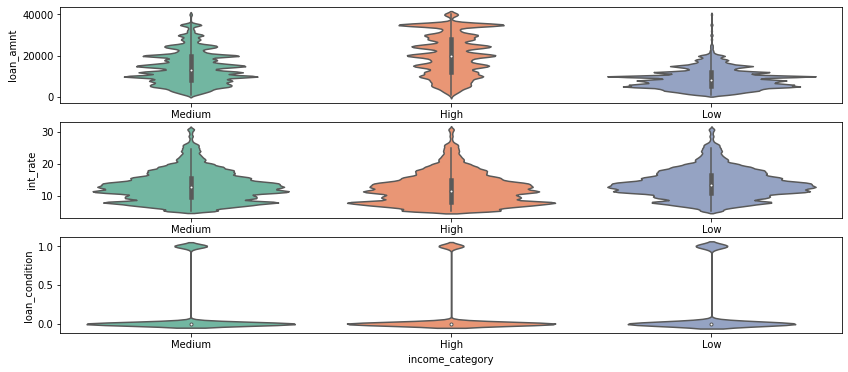

In [ ]:
fig, ax= plt.subplots(3,1, figsize=(14,6))

sns.violinplot(x="income_category", y="loan_amnt", data=data, palette="Set2", ax=ax[0] )
sns.violinplot(x="income_category", y="int_rate", data=data, palette="Set2", ax=ax[1])
sns.violinplot(x="income_category", y="loan_condition", data=data, palette="Set2", ax=ax[2])

#### Based on the violin plots above, we can tell people with low income tent to have higher interest rates while people with high income had average lower interest rates.
#### The third violin plot also shows people with lower income also had higher chance to default. 

### 3. Credit Score

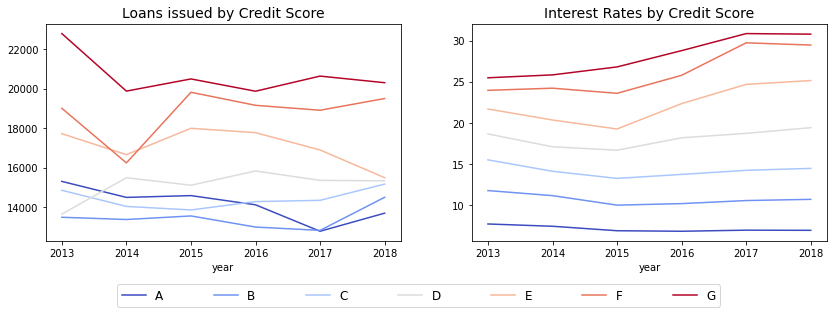

In [ ]:
dt_series = pd.to_datetime(data['issue_d'])
data['year'] = dt_series.dt.year

f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = data.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = data.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

Text(0, 0.5, 'Interest Rate (%)')

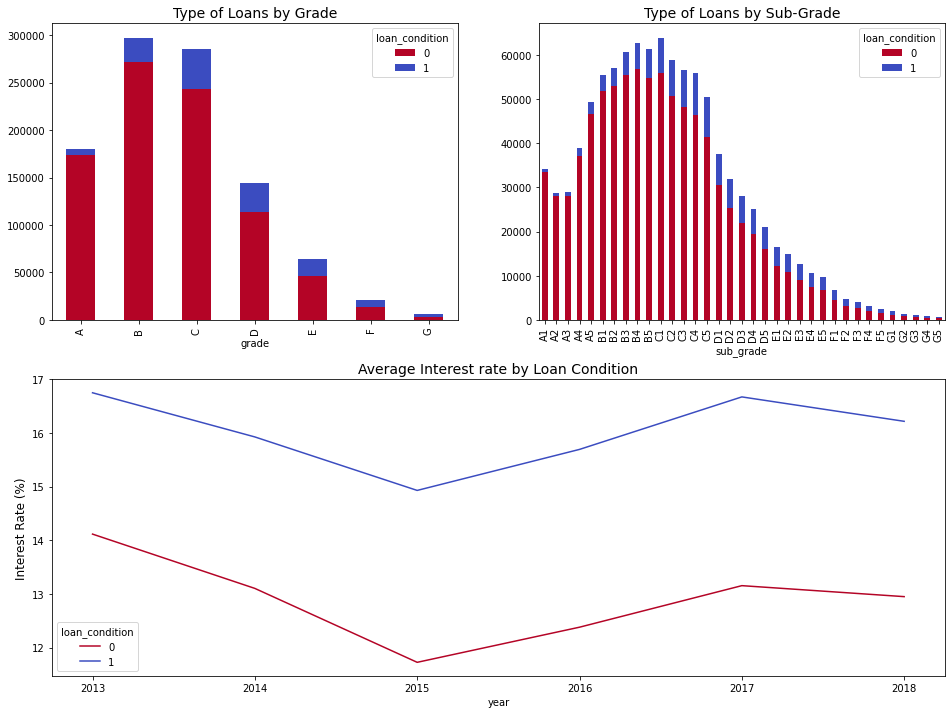

In [ ]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

cmap = plt.cm.coolwarm_r

loans_by_region = data.groupby(['grade', 'loan_condition']).size()
loans_by_region.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax1, grid=False)
ax1.set_title('Type of Loans by Grade', fontsize=14)


loans_by_grade = data.groupby(['sub_grade', 'loan_condition']).size()
loans_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, ax=ax2, grid=False)
ax2.set_title('Type of Loans by Sub-Grade', fontsize=14)

by_interest = data.groupby(['year', 'loan_condition']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Average Interest rate by Loan Condition', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)

#### It's interesting to find out that people with lower credit score tent to have higher loan amount even they needed to pay higher interest rate due to bad credit.
#### Also, people with a grade of "B" or "C" were more likely to default.

### 4. Home Ownership

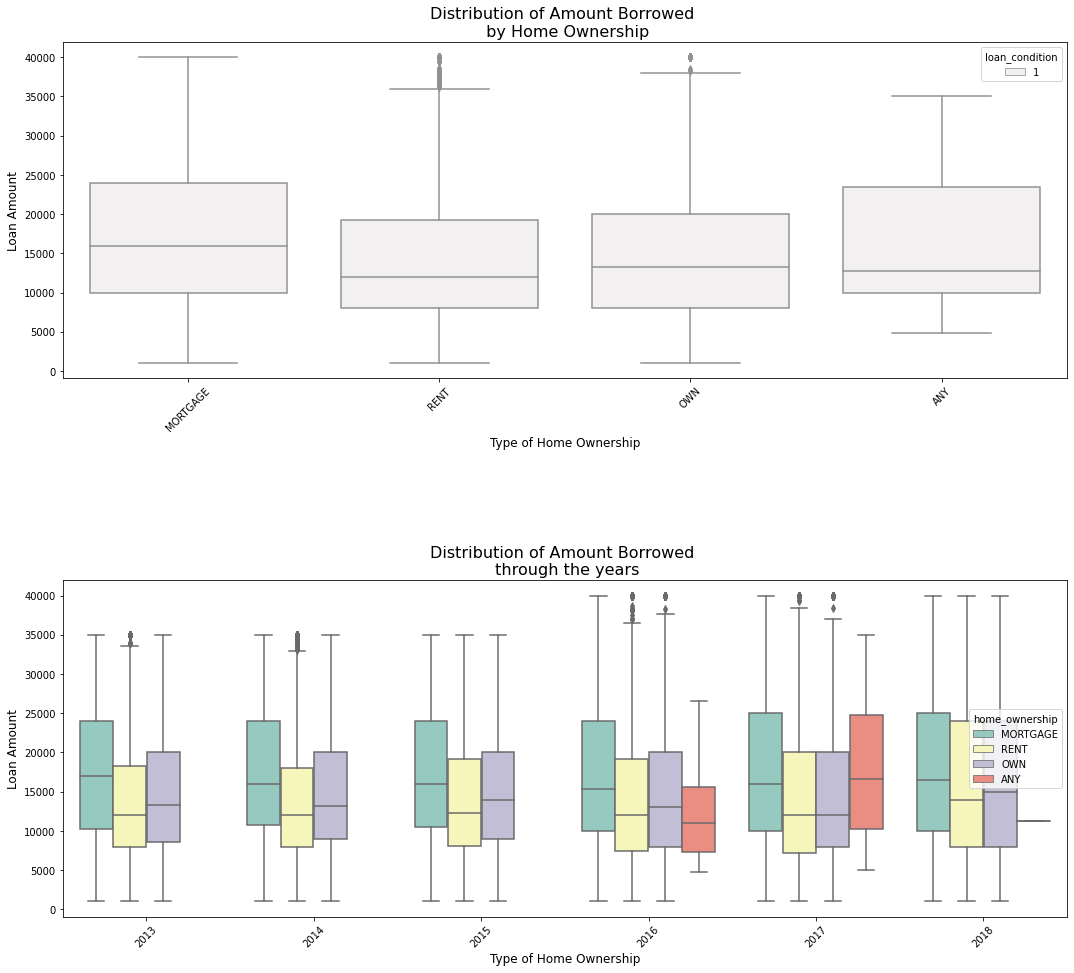

In [ ]:
plt.figure(figsize=(18,18))

# Create a dataframe for bad loans
bad_df = data.loc[data['target'] == 1]

plt.subplot(211)
g = sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_condition',
               data=bad_df, color='r')

g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Type of Home Ownership", fontsize=12)
g.set_ylabel("Loan Amount", fontsize=12)
g.set_title("Distribution of Amount Borrowed \n by Home Ownership", fontsize=16)



plt.subplot(212)
g1 = sns.boxplot(x='year', y='loan_amnt', hue='home_ownership',
               data=bad_df, palette="Set3")
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Type of Home Ownership", fontsize=12)
g1.set_ylabel("Loan Amount", fontsize=12)
g1.set_title("Distribution of Amount Borrowed \n through the years", fontsize=16)


plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

#### From the overall whisker plot, people with a mortgage tent to default.
#### Also, the graph below shows people with mortgage had a higher chance to default recently.

### Therefore,if a borrower have the follow feature, Lending club should have a further assessment for the loan application：
### * Living in Mississipi, Nebraska or Arizona
### * Annual income <= $47,000
### * Credit score is B or C
### * has mortgage





